In [1]:
%matplotlib inline

# import statements
import numpy as np
import matplotlib.pyplot as plt #for figures
from mpl_toolkits.basemap import Basemap #to render maps
import math
import json #to write dict with parameters

import GrowYourIC
from GrowYourIC import positions, geodyn, geodyn_trg, geodyn_static, plot_data, data

plt.rcParams['figure.figsize'] = (8.0, 3.0) #size of figures
cm = plt.cm.get_cmap('viridis')
cm2 = plt.cm.get_cmap('winter')

In [2]:
print("==== Models ====")

age_ic_dim = 1e9 #in years
rICB_dim = 1221. #in km

velocity_center = [0., 100.]#center of the eastern hemisphere
center = [0,-80] #center of the western hemisphere

units = None #we give them already dimensionless parameters. 
rICB = 1.
age_ic = 1.

#Fast translation
v_fast = 10.3
v_dim = 12.6
omega_fast = 7.85
time_translation = rICB_dim*1e3/4e-10/(np.pi*1e7)
maxAge = 2.*time_translation/1e6
velocity_fast = geodyn_trg.translation_velocity(velocity_center, v_fast)
exponent_fast = 0.1

proxy_type = "age"
proxy_name = "age (Myears)" #growth rate (km/Myears)"
proxy_lim = [0, maxAge]

print("=== Model 1 : fast translation, no rotation ===")


FastTranslation = geodyn_trg.TranslationGrowthRotation() #can do all the models presented in the paper
parameters = dict({'units': units,
              'rICB': rICB, 
              'tau_ic':age_ic,
              'vt': velocity_fast,
              'exponent_growth': exponent_fast,
              'omega': 0.,
              'proxy_type': proxy_type, 
              'proxy_name': proxy_name,
              'proxy_lim': proxy_lim})
FastTranslation.set_parameters(parameters)
FastTranslation.define_units()

print("=== Model 2 : fast translation, rotation ===")

FastTranslation2 = geodyn_trg.TranslationGrowthRotation() #can do all the models presented in the paper
parameters = dict({'units': units,
              'rICB': rICB, 
              'tau_ic':age_ic,
              'vt': velocity_fast,
              'exponent_growth': exponent_fast,
              'omega': omega_fast,
              'proxy_type': proxy_type, 
              'proxy_name': proxy_name,
              'proxy_lim': proxy_lim})
FastTranslation2.set_parameters(parameters)
FastTranslation2.define_units()

==== Models ====
=== Model 1 : fast translation, no rotation ===
=== Model 2 : fast translation, rotation ===


In [3]:
## real data set - WD13
data_set = data.SeismicFromFile("../GrowYourIC/data/results.dat")
data_set.method = "bt_point"
proxy1 = geodyn.evaluate_proxy(data_set, FastTranslation, verbose=False)
proxy2 = geodyn.evaluate_proxy(data_set, FastTranslation2, verbose=False)

# random data set -
data_set_random = data.RandomData(3000)
data_set_random.method = "bt_point"
proxy_random1 = geodyn.evaluate_proxy(data_set_random, FastTranslation, verbose=False)
proxy_random2 = geodyn.evaluate_proxy(data_set_random, FastTranslation2, verbose=False)

===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is age
= Data set is Data set from Waszek and Deuss 2011
= Proxy is evaluated for bt_point
= Number of points to examine: 3184


/usr/local/lib/python3.5/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


===
===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is age
= Data set is Data set from Waszek and Deuss 2011
= Proxy is evaluated for bt_point
= Number of points to examine: 3184
===
===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is age
= Data set is Random repartition of data, between 0 and 100km depth
= Proxy is evaluated for bt_point
= Number of points to examine: 3000
===
===
== Evaluate value of proxy for all points of the data set 
= Geodynamic model isi Translation, Rotation and Growth
= Proxy is age
= Data set is Random repartition of data, between 0 and 100km depth
= Proxy is evaluated for bt_point
= Number of points to examine: 3000
===


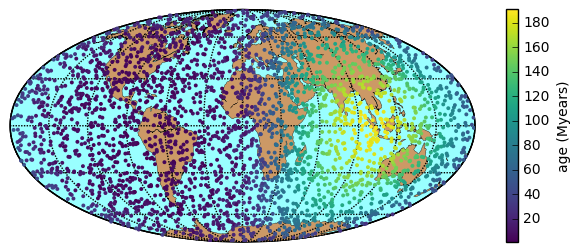

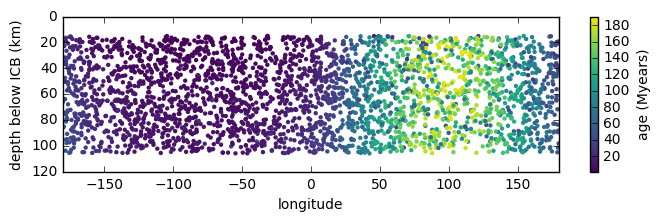

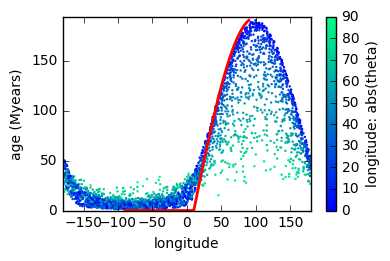

In [9]:
r, t, p = data_set_random.extract_rtp("bottom_turning_point")
dist = positions.angular_distance_to_point(t, p, *center)

## map
m, fig = plot_data.setting_map() 
x, y = m(p, t)
sc = m.scatter(x, y, c=proxy_random1,s=8, zorder=10, cmap=cm, edgecolors='none')
cbar = plt.colorbar(sc)
cbar.set_label(FastTranslation.proxy_name)

fig, ax = plt.subplots(figsize=(8, 2))
sc=ax.scatter(p,rICB_dim*(1.-r), c=proxy_random1, s=10,cmap=cm, linewidth=0)
ax.set_ylim(-0,120)
fig.gca().invert_yaxis()
ax.set_xlim(-180,180)
cbar = fig.colorbar(sc)
if proxy_lim is not None:
    cbar.set_clim(0, maxAge)
ax.set_xlabel("longitude")
ax.set_ylabel("depth below ICB (km)")
cbar.set_label(FastTranslation.proxy_name)

## phi and distance plots
fig, ax = plt.subplots(1,1, figsize=(4.0, 2.5))
sc1 = ax.scatter(p, proxy_random1, c=abs(t),s=3, cmap=cm2, vmin =-0, vmax =90, linewidth=0)
phi = np.linspace(-180,180, 50)
ax.set_xlabel("longitude")
ax.set_ylabel(proxy_name)
if proxy_lim is not None:
    ax.set_ylim(proxy_lim)
phi = np.linspace(-90,90, 100)
if proxy_type == "age":
    analytic_equator = np.maximum(2*np.sin((phi-10)*np.pi/180.)*rICB_dim*1e3/v_dim*1e-3,0.)
    ax.plot(phi,analytic_equator, 'r', linewidth=2)
ax.set_xlim([-180,180])
cbar = fig.colorbar(sc1)
cbar.set_label("longitude: abs(theta)")

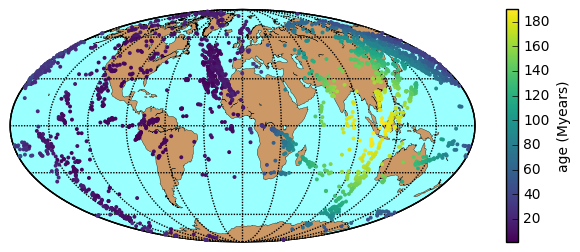

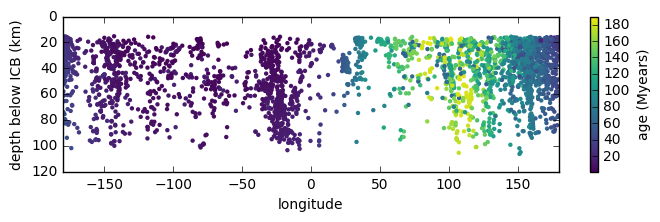

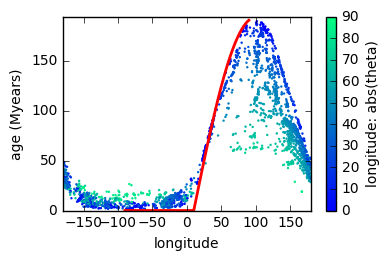

In [8]:
r, t, p = data_set.extract_rtp("bottom_turning_point")
dist = positions.angular_distance_to_point(t, p, *center)

## map
m, fig = plot_data.setting_map() 
x, y = m(p, t)
sc = m.scatter(x, y, c=proxy1,s=8, zorder=10, cmap=cm, edgecolors='none')
cbar = plt.colorbar(sc)
cbar.set_label(FastTranslation.proxy_name)

fig, ax = plt.subplots(figsize=(8, 2))
sc=ax.scatter(p,rICB_dim*(1.-r), c=proxy1, s=10,cmap=cm, linewidth=0)
ax.set_ylim(-0,120)
fig.gca().invert_yaxis()
ax.set_xlim(-180,180)
cbar = fig.colorbar(sc)
if proxy_lim is not None:
    cbar.set_clim(0, maxAge)
ax.set_xlabel("longitude")
ax.set_ylabel("depth below ICB (km)")
cbar.set_label(FastTranslation.proxy_name)

## phi and distance plots
fig, ax = plt.subplots(1,1, figsize=(4.0, 2.5))
sc1 = ax.scatter(p, proxy1, c=abs(t),s=3, cmap=cm2, vmin =-0, vmax =90, linewidth=0)
phi = np.linspace(-180,180, 50)
ax.set_xlabel("longitude")
ax.set_ylabel(proxy_name)
if proxy_lim is not None:
    ax.set_ylim(proxy_lim)
phi = np.linspace(-90,90, 100)
if proxy_type == "age":
    analytic_equator = np.maximum(2*np.sin((phi-10)*np.pi/180.)*rICB_dim*1e3/v_dim*1e-3,0.)
    ax.plot(phi,analytic_equator, 'r', linewidth=2)
ax.set_xlim([-180,180])
cbar = fig.colorbar(sc1)
cbar.set_label("longitude: abs(theta)")

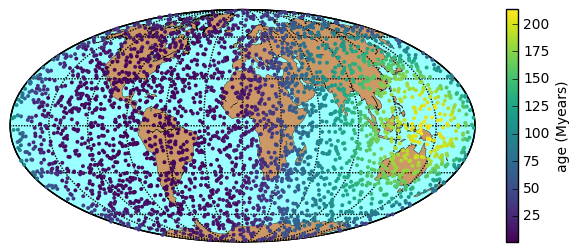

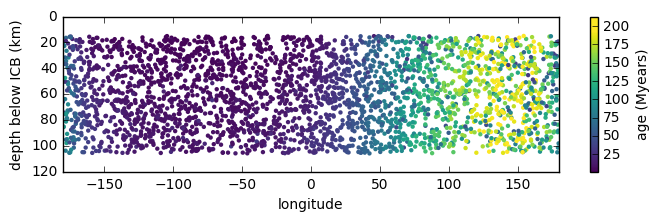

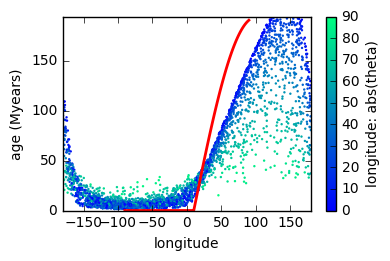

In [10]:
r, t, p = data_set_random.extract_rtp("bottom_turning_point")
dist = positions.angular_distance_to_point(t, p, *center)

## map
m, fig = plot_data.setting_map() 
x, y = m(p, t)
sc = m.scatter(x, y, c=proxy_random2,s=8, zorder=10, cmap=cm, edgecolors='none')
cbar = plt.colorbar(sc)
cbar.set_label(FastTranslation.proxy_name)

fig, ax = plt.subplots(figsize=(8, 2))
sc=ax.scatter(p,rICB_dim*(1.-r), c=proxy_random2, s=10,cmap=cm, linewidth=0)
ax.set_ylim(-0,120)
fig.gca().invert_yaxis()
ax.set_xlim(-180,180)
cbar = fig.colorbar(sc)
if proxy_lim is not None:
    cbar.set_clim(0, maxAge)
ax.set_xlabel("longitude")
ax.set_ylabel("depth below ICB (km)")
cbar.set_label(FastTranslation.proxy_name)

## phi and distance plots
fig, ax = plt.subplots(1,1, figsize=(4.0, 2.5))
sc1 = ax.scatter(p, proxy_random2, c=abs(t),s=3, cmap=cm2, vmin =-0, vmax =90, linewidth=0)
phi = np.linspace(-180,180, 50)
ax.set_xlabel("longitude")
ax.set_ylabel(proxy_name)
if proxy_lim is not None:
    ax.set_ylim(proxy_lim)
phi = np.linspace(-90,90, 100)
if proxy_type == "age":
    analytic_equator = np.maximum(2*np.sin((phi-10)*np.pi/180.)*rICB_dim*1e3/v_dim*1e-3,0.)
    ax.plot(phi,analytic_equator, 'r', linewidth=2)
ax.set_xlim([-180,180])
cbar = fig.colorbar(sc1)
cbar.set_label("longitude: abs(theta)")

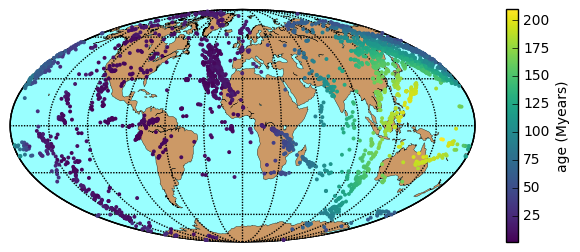

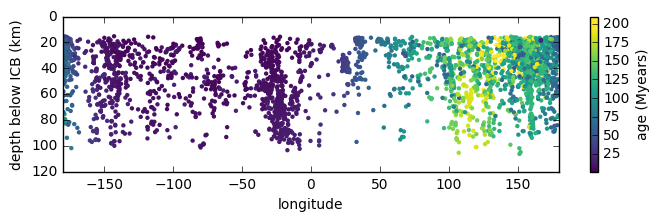

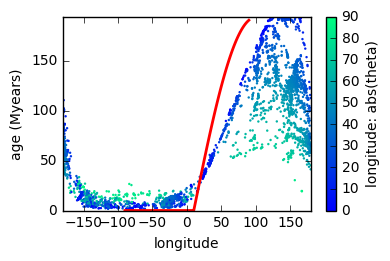

In [12]:
r, t, p = data_set.extract_rtp("bottom_turning_point")
dist = positions.angular_distance_to_point(t, p, *center)

## map
m, fig = plot_data.setting_map() 
x, y = m(p, t)
sc = m.scatter(x, y, c=proxy2,s=8, zorder=10, cmap=cm, edgecolors='none')
cbar = plt.colorbar(sc)
cbar.set_label(FastTranslation.proxy_name)

fig, ax = plt.subplots(figsize=(8, 2))
sc=ax.scatter(p,rICB_dim*(1.-r), c=proxy2, s=10,cmap=cm, linewidth=0)
ax.set_ylim(-0,120)
fig.gca().invert_yaxis()
ax.set_xlim(-180,180)
cbar = fig.colorbar(sc)
if proxy_lim is not None:
    cbar.set_clim(0, maxAge)
ax.set_xlabel("longitude")
ax.set_ylabel("depth below ICB (km)")
cbar.set_label(FastTranslation.proxy_name)

## phi and distance plots
fig, ax = plt.subplots(1,1, figsize=(4.0, 2.5))
sc1 = ax.scatter(p, proxy2, c=abs(t),s=3, cmap=cm2, vmin =-0, vmax =90, linewidth=0)
phi = np.linspace(-180,180, 50)
ax.set_xlabel("longitude")
ax.set_ylabel(proxy_name)
if proxy_lim is not None:
    ax.set_ylim(proxy_lim)
phi = np.linspace(-90,90, 100)
if proxy_type == "age":
    analytic_equator = np.maximum(2*np.sin((phi-10)*np.pi/180.)*rICB_dim*1e3/v_dim*1e-3,0.)
    ax.plot(phi,analytic_equator, 'r', linewidth=2)
ax.set_xlim([-180,180])
cbar = fig.colorbar(sc1)
cbar.set_label("longitude: abs(theta)")